# Notebook for Kaggle Toxic Comments Prediction

This is a notebook for the kaggle toxic comments prediction competition:
    [lin kere](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

## Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv", delimiter = ",")
test_df = pd.read_csv("test.csv", delimiter = ",")

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_df.iloc[1, 1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [5]:
train_text = train_df['comment_text']

In [6]:
train_text.describe()

count                                                159571
unique                                               159571
top       "\n\nAn invitation for you!\n\n . You're invit...
freq                                                      1
Name: comment_text, dtype: object

In [7]:
train_df.shape

(159571, 8)

In [8]:
test_df.shape

(153164, 2)

In [9]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


## Visualizing Data

In [10]:
toxic = train_df['toxic']

(array([ 144277.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   15294.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

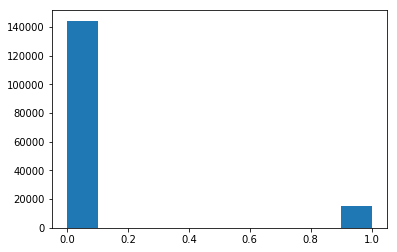

In [11]:
plt.hist(toxic)

# Get the Text

In [12]:
train_text = train_df['comment_text']
test_text = test_df['comment_text']

In [13]:
train_text.isnull().sum()

0

In [14]:
test_text.isnull().sum()

0

# Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(analyzer="word", ngram_range=(1,3), \
                            stop_words="english", dtype=np.float32)

In [17]:
train_vec = vectorizer.fit_transform(train_text)

In [18]:
test_vec = vectorizer.transform(test_text)

In [19]:
train_vec.shape

(159571, 6809271)

In [20]:
test_vec.shape

(153164, 6809271)

## Prediction for Toxic or Not

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
toxic_Y_train = train_df['toxic']

In [23]:
logreg = LogisticRegression()
logreg.fit(train_vec, toxic_Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
acc_log = round(logreg.score(train_vec, toxic_Y_train) * 100, 2)
acc_log

95.109999999999999

In [25]:
toxic_pred = logreg.predict_proba(test_vec)

# Get All the Target Classes

In [26]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [27]:
targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [28]:
# Train and test severe_toxic
severe_toxic_Y_train = train_df['severe_toxic']
logreg = LogisticRegression()
logreg.fit(train_vec, severe_toxic_Y_train)
acc_log = round(logreg.score(train_vec, severe_toxic_Y_train) * 100, 2)
acc_log

99.099999999999994

In [29]:
severe_toxic_pred = logreg.predict_proba(test_vec)

In [30]:
#targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']
# Train and test obscene
obscene_Y_train = train_df['obscene']
logreg = LogisticRegression()
logreg.fit(train_vec, obscene_Y_train)
obscene_pred = logreg.predict_proba(test_vec)
acc_log = round(logreg.score(train_vec, obscene_Y_train) * 100, 2)
acc_log

97.420000000000002

In [31]:
#targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']
# Train and test obscene
threat_Y_train = train_df['threat']
logreg = LogisticRegression()
logreg.fit(train_vec, threat_Y_train)
threat_pred = logreg.predict_proba(test_vec)
acc_log = round(logreg.score(train_vec, threat_Y_train) * 100, 2)
acc_log

99.700000000000003

In [32]:
#targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']
# Train and test obscene
insult_Y_train = train_df['insult']
logreg = LogisticRegression()
logreg.fit(train_vec, insult_Y_train)
insult_pred = logreg.predict_proba(test_vec)
acc_log = round(logreg.score(train_vec, insult_Y_train) * 100, 2)
acc_log

96.920000000000002

In [33]:
#targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
#       'insult', 'identity_hate']
# Train and test obscene
identity_hate_Y_train = train_df['identity_hate']
logreg = LogisticRegression()
logreg.fit(train_vec, identity_hate_Y_train)
identity_hate_pred = logreg.predict_proba(test_vec)
acc_log = round(logreg.score(train_vec, identity_hate_Y_train) * 100, 2)
acc_log

99.170000000000002

# Make Submission

In [34]:
submission_array = np.zeros((test_text.shape[0], len(targets)), dtype=np.float32)

In [35]:
submission_array.shape

(153164, 6)

In [36]:
toxic_pred[0:5]

array([[ 0.00191909,  0.99808091],
       [ 0.97350821,  0.02649179],
       [ 0.96253087,  0.03746913],
       [ 0.99273206,  0.00726794],
       [ 0.94995214,  0.05004786]])

In [37]:
submission_array[:,0] = toxic_pred[:,1]

In [38]:
submission_array[:,1] = severe_toxic_pred[:,1]
submission_array[:,2] = obscene_pred[:,1]
submission_array[:,3] = threat_pred[:,1]
submission_array[:,4] = insult_pred[:,1]
submission_array[:,5] = identity_hate_pred[:,1]

In [39]:
submission_df = pd.DataFrame(submission_array, columns=targets)

In [40]:
submission_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.998081,0.307892,0.996951,0.019316,0.981927,0.267294
1,0.026492,0.005508,0.016811,0.002657,0.018727,0.006227
2,0.037469,0.005375,0.018796,0.002481,0.020865,0.006129
3,0.007268,0.003486,0.006419,0.001984,0.006798,0.002997
4,0.050048,0.003947,0.019697,0.002443,0.020432,0.004149


In [41]:
submission_df["id"] = test_df["id"]

In [42]:
submission_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,id
0,0.998081,0.307892,0.996951,0.019316,0.981927,0.267294,00001cee341fdb12
1,0.026492,0.005508,0.016811,0.002657,0.018727,0.006227,0000247867823ef7
2,0.037469,0.005375,0.018796,0.002481,0.020865,0.006129,00013b17ad220c46
3,0.007268,0.003486,0.006419,0.001984,0.006798,0.002997,00017563c3f7919a
4,0.050048,0.003947,0.019697,0.002443,0.020432,0.004149,00017695ad8997eb


In [43]:
new_cols = submission_df.columns.tolist()
new_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'id']

In [44]:
cols = new_cols[-1:] + new_cols[:-1] 
cols

['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [45]:
submission_df = submission_df[cols]

In [46]:
submission_df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.998081,0.307892,0.996951,0.019316,0.981927,0.267294
1,0000247867823ef7,0.026492,0.005508,0.016811,0.002657,0.018727,0.006227
2,00013b17ad220c46,0.037469,0.005375,0.018796,0.002481,0.020865,0.006129
3,00017563c3f7919a,0.007268,0.003486,0.006419,0.001984,0.006798,0.002997
4,00017695ad8997eb,0.050048,0.003947,0.019697,0.002443,0.020432,0.004149


In [47]:
output_file = "logisticregression.submission"

In [48]:
submission_df.to_csv(output_file, index=False)

# Make Predictions on Cleaned Data

In [49]:
train_df.shape

(159571, 8)

In [50]:
test_df.shape

(153164, 2)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 6007, analyzer="word", ngram_range=(1,3), \
                            stop_words="english", dtype=np.float32)

In [55]:
train_text = []
f_in = open("train_sentences.clean", "r")
while True:
    sent = f_in.readline()
    if sent == "":
        break
    train_text.append(sent)
len(train_text)

FileNotFoundError: [Errno 2] No such file or directory: 'train_sentences.clean'

In [53]:
test_text = []
f_in = open("test_sentences.clean", "r")
while True:
    sent = f_in.readline()
    if sent == "":
        break
    test_text.append(sent)
len(test_text)

FileNotFoundError: [Errno 2] No such file or directory: 'test_sentences.clean'

In [56]:
train_vec = vectorizer.fit_transform(train_text)
test_vec = vectorizer.transform(test_text)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [12]:
train_vec.shape

(159571, 6007)

In [13]:
test_vec.shape

(153164, 6007)

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

In [15]:
Y_train = train_df['toxic']
random_forest.fit(train_vec, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
acc_log = round(random_forest.score(train_vec, Y_train) * 100, 2)
acc_log

99.74

In [19]:
Y_pred = random_forest.predict_proba(test_vec)

In [20]:
Y_pred[0:5]

array([[0.08, 0.92],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [21]:
Y_train[0:5]

0    0
1    0
2    0
3    0
4    0
Name: toxic, dtype: int64

In [22]:
train_text[0]

'explanation why the edits made under my username hardcore metallica fan were reverted   they were nt vandalisms   just closure on some gas after i voted at new york dolls fac   and please do nt remove the template from the talk page since i am retired now NUM\n'

In [23]:
targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
preds = np.zeros((test_vec.shape[0], len(targets)), dtype = np.float32)

for idx, target in enumerate(targets):
    Y_train = train_df[target]
    random_forest.fit(train_vec, Y_train)
    Y_pred = random_forest.predict_proba(test_vec)
    preds[:, idx] = Y_pred[:, 1]   

In [24]:
preds[0:5]

array([[0.92 , 0.235, 0.874, 0.06 , 0.77 , 0.17 ],
       [0.02 , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.01 , 0.   , 0.   , 0.01 , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.01 , 0.   ]], dtype=float32)

In [25]:
rf_submissions = pd.DataFrame(preds, columns = targets)

In [26]:
rf_submissions.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.92,0.235,0.874,0.06,0.77,0.17
1,0.02,0.000,0.000,0.00,0.00,0.00
2,0.00,0.000,0.000,0.00,0.00,0.00
3,0.01,0.000,0.000,0.01,0.00,0.00
4,0.00,0.000,0.000,0.00,0.01,0.00


In [27]:
rf_submissions["id"] = test_df["id"]

In [28]:
rf_submissions.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,id
0,0.92,0.235,0.874,0.06,0.77,0.17,00001cee341fdb12
1,0.02,0.000,0.000,0.00,0.00,0.00,0000247867823ef7
2,0.00,0.000,0.000,0.00,0.00,0.00,00013b17ad220c46
3,0.01,0.000,0.000,0.01,0.00,0.00,00017563c3f7919a
4,0.00,0.000,0.000,0.00,0.01,0.00,00017695ad8997eb


In [29]:
reordered_cols = ["id"] + targets

In [31]:
rf_submissions = rf_submissions[reordered_cols]

In [32]:
rf_submissions.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.92,0.235,0.874,0.06,0.77,0.17
1,0000247867823ef7,0.02,0.000,0.000,0.00,0.00,0.00
2,00013b17ad220c46,0.00,0.000,0.000,0.00,0.00,0.00
3,00017563c3f7919a,0.01,0.000,0.000,0.01,0.00,0.00
4,00017695ad8997eb,0.00,0.000,0.000,0.00,0.01,0.00


In [33]:
output_file = "random_forests.submission"
rf_submissions.to_csv(output_file, index=False)

# Logistic Regression on Cleaned data

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
logreg_preds = np.zeros((test_vec.shape[0], len(targets)), dtype = np.float32)

for idx, target in enumerate(targets):
    Y_train = train_df[target]
    logreg.fit(train_vec, Y_train)
    Y_pred = logreg.predict_proba(test_vec)
    logreg_preds[:, idx] = Y_pred[:, 1]   

In [35]:
logreg_submissions_2 = pd.DataFrame(logreg_preds, columns = targets)
logreg_submissions_2["id"] = test_df["id"]

In [36]:
output_file = "logreg_2.submission"
logreg_submissions_2.to_csv(output_file, index=False)